# Explorarea și Curățarea Datelor – Auto MPG

Acest notebook este un **mini-proiect de recapitulare pe date**. Lucrezi în perechi și **alegi singur(ă)** ce metode/ploturi sunt potrivite.

**Scop:** să înțelegem ce factori pot influența `mpg` (consum).

**Set:** `https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv`.

## 0) Setup rapid
- Importă bibliotecile pe care le consideri necesare (pandas, numpy, matplotlib/plotly etc.).
- Configurează opțiuni de afișare dacă vrei.

In [14]:
# scrie codul tău aici
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

import matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)  # arată până la 100 de coloane
pd.set_option("display.width", 100)        # lățimea maximă a liniei


## 1) Înțelegerea datasetului
- Încarcă datele în Pandas și inspectează câteva rânduri pentru a vedea cum arată.
- **Explică forma și tipurile de date care se folosesc aici** (numeric vs categoric): ce înseamnă în context?

**Scop:** să știm cu ce date lucrăm și cum trebuie pregătit setul pentru modelare.


In [15]:
# scrie codul tău aici

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"

# Citim CSV-ul într-un DataFrame (tabel Pandas)
df = pd.read_csv(url)

# Vizualizăm primele 5 rânduri (sanity check)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [16]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Avem date despre motorul mai multor tipuri de masini
Avem multe date numerice, care prezinta caracteristicile motoarelor
este si o categoricala, tara de origine
Valorile numerica par toate in regula

## 2) Calitatea datelor
- Verifică **valori lipsă**, **rânduri duplicate** și valori **aberante**.
- Notează pe scurt potențialul impact asupra analizei.

In [17]:
# scrie codul tău aici

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [18]:
df["origin"].value_counts(dropna=False)

,count
origin,
usa,249
japan,79
europe,70


In [19]:
df["name"].value_counts(dropna=False)

,count
name,
ford pinto,6
ford maverick,5
amc matador,5
toyota corolla,5
amc hornet,4
...,...
amc concord dl,1
volkswagen rabbit l,1
mazda glc custom l,1


In [20]:
df.duplicated().sum()

np.int64(0)

Se observa ca avem 6 valori nule, pentru coloana horsepower
Coloanele categorice sunt bune, au valori coerente
Nu avem duplicate

## 3) Curățare și consistență
- Creează o **copie de lucru** (`df_clean`).
- **Dacă este cazul**, uniformizează formatele (ex. texte lowercase/strip), tratează duplicate/inconsistențe.
- **Explică deciziile**: ce ai schimbat și de ce / sau de ce setul e coerent.

In [28]:
# scrie codul tău aici

#coloana nume in lowercase
df_clean['name'] = df_clean['name'].str.lower()

## 4) Valorile lipsă (dacă există)
- Arată câte valori lipsesc pe coloană.
- Dacă există, alege o strategie (eliminare / completare cu medie/mediana/mod).
- Aplică strategia aleasă.

- Dacă nu există, ce metodă ai alege pentru o coloană (la alegere), dacă ar fi cazul?

**Explică:** Cum ai decis metoda pentru fiecare tip de variabilă?

In [30]:
# scrie codul tău aici

# eliminam horsepower pe NAN
df_clean = df.dropna(subset=['horsepower']).copy()

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


in cazul valorilor NAN din coloana horsepower, este bine sa le eliminam, ptr ca sunt corelatii puternice intre aceste caracteristici - am putea sa prezicem ce valori sunt acolo in functie de celelalte



## 5) Explorarea distribuțiilor
**Scop:** înțelege răspândirea și outlierii pentru variabilele numerice relevante.  
- Alege o **vizualizare** potrivită pentru distribuții.
- Evidențiază **valori neobișnuite**.
- Concluzie: care variabilă are cea mai mare variație? Unde apar extreme?

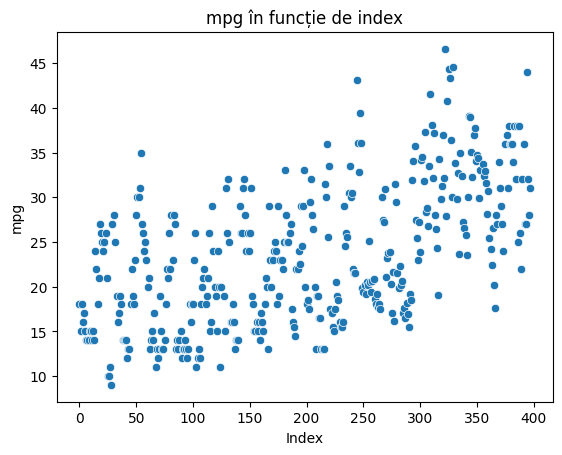

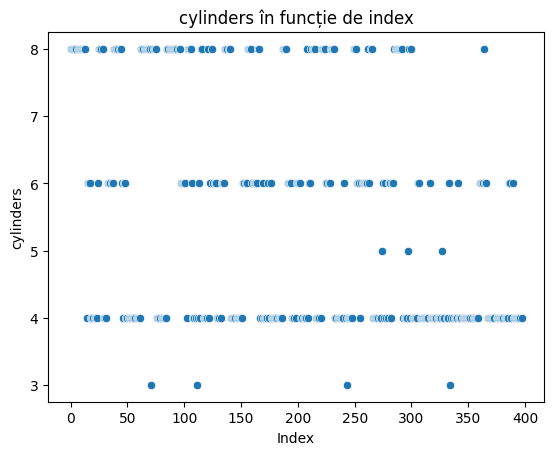

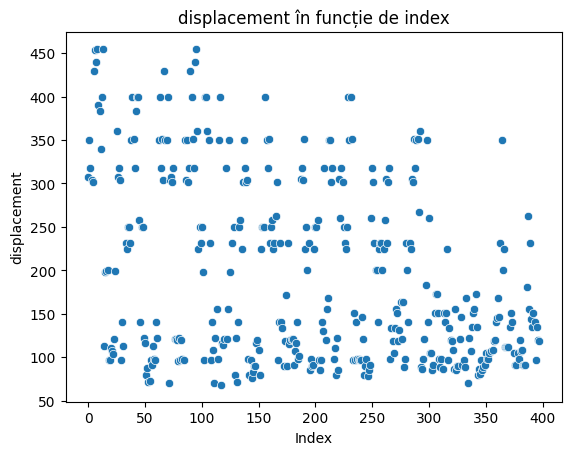

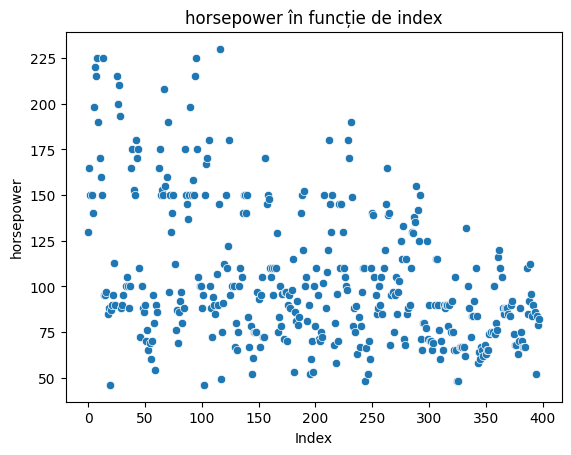

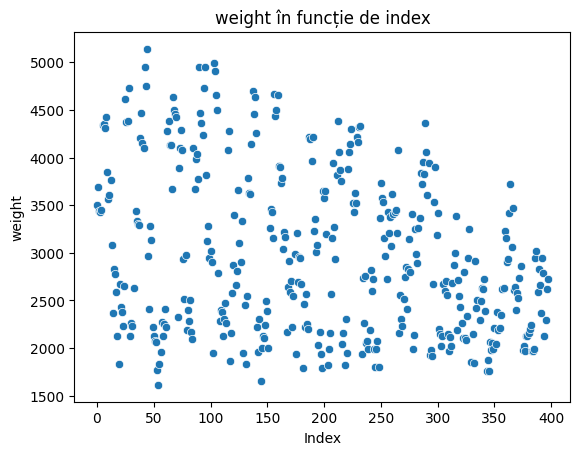

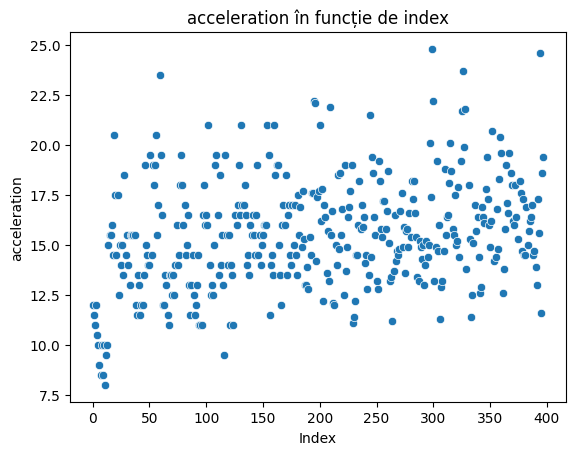

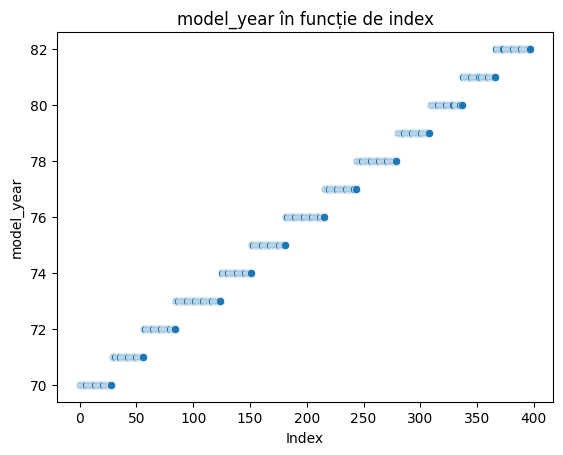

In [34]:
# scrie codul tău aici
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

for col in numeric_cols:
    sns.scatterplot(x=df_clean.index, y=df_clean[col])
    plt.title(f'{col} în funcție de index')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


Atat din describe de la punctele anterioare, dar si din diagramele de tip scatter, nu se observa outliers sau valori iesite din comun, cu exceptia numarului de cilindrii, unde avem doar 3 sau 5, in total doar 8 inregistrari. Consider ca aceste cazuri trebuie eliminate.

In [35]:
df_clean = df_clean[~df_clean['cylinders'].isin([3, 5])]

## 6) Relații între variabile
**Scop:** descoperă legături între factori și `mpg`.  
- Alege o reprezentare pentru a arăta **cum se schimbă `mpg`** în funcție de alți factori (numeric sau categoric).
- Construiește o vizualizare pentru **tendință numeric–numeric** între o trăsătură numerică și `mpg`.
- Concluzie: ce relații vizibile observi?

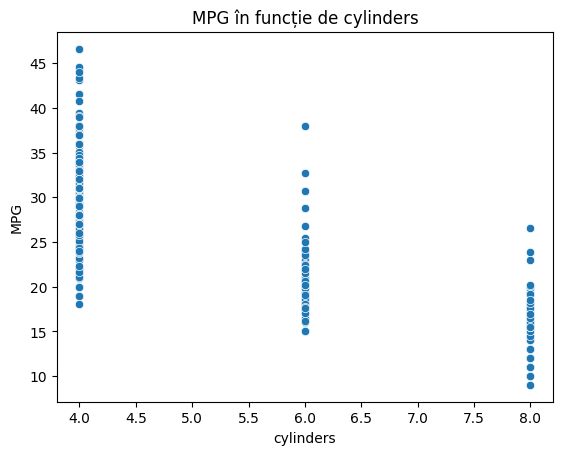

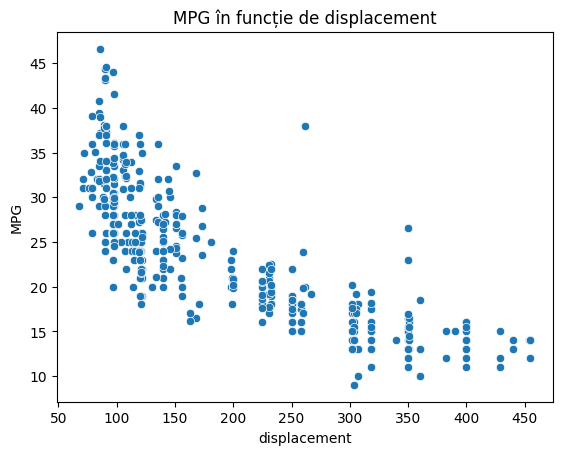

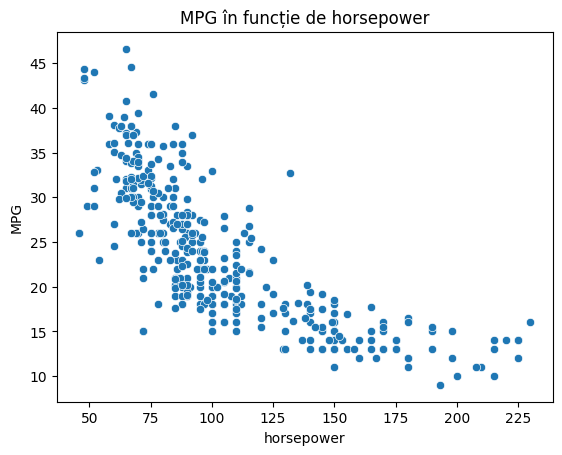

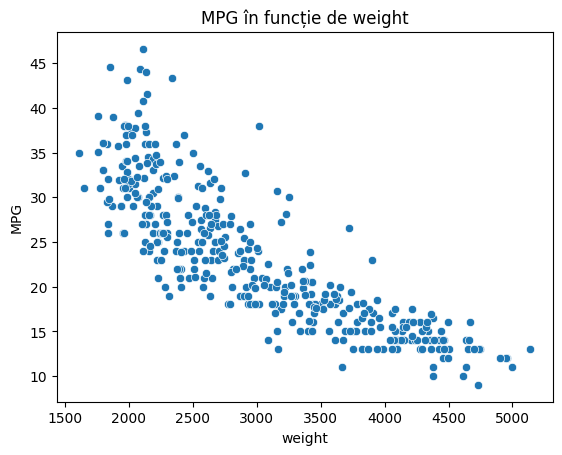

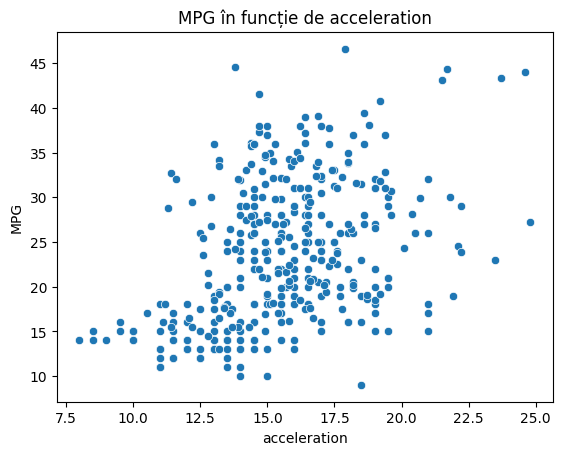

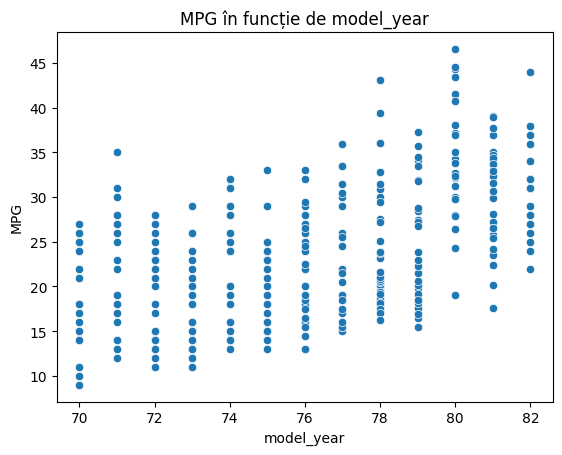

In [36]:
# scrie codul tău aici
import seaborn as sns
import matplotlib.pyplot as plt

# coloanele numerice de interes (fără 'mpg')
numeric_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

# scatter plot pentru fiecare
for col in numeric_cols:
    sns.scatterplot(x=col, y='mpg', data=df_clean)
    plt.title(f'MPG în funcție de {col}')
    plt.xlabel(col)
    plt.ylabel('MPG')
    plt.show()


Observam ca numarul de cilindrii sau anul fabricatiei au o importanta la consum, si anume ca un nr mai mare de cilindri consuma mai mult, iar un an mai recent arata o eficienta mai mare
Se observa ca daca avem mai multi cai putere, capacitate sau masa, consumul creste - aici avem mile per galon, invers ca in Europa. Este normal pentru ca in aceste cazuri se foloseste mai mult combustibil pe unitatea de distanta
iar la accelerartie nu se observa o corelatie puternica

## 7) Analiză pe variabile categorice
**Scop:** vezi diferențe între grupuri.  
- Vizualizează **distribuțiile pe categorii**.
- Compară **valorile medii ale țintei** între categorii.
- Concluzie: ce grupuri ies în evidență?

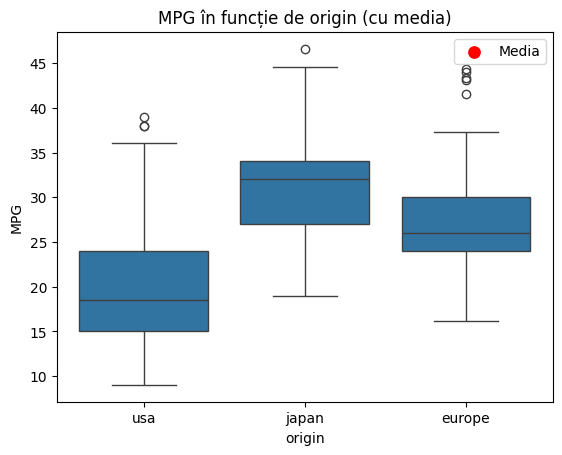

In [40]:
# scrie codul tău aici

categorical_col = 'origin'

sns.boxplot(x=categorical_col, y='mpg', data=df_clean)
plt.title(f'MPG în funcție de {categorical_col}')
plt.xlabel(categorical_col)
plt.ylabel('MPG')
plt.show()


In [41]:
mean_mpg = df_clean.groupby(categorical_col)['mpg'].mean()
print(f"Media MPG pe {categorical_col}:")
print(mean_mpg)


Media MPG pe origin:
origin
europe    27.613846
japan     30.978667
usa       20.033469
Name: mpg, dtype: float64


Se observa ca masinile din Japonia sunt cele mai bune la consum, urmate de cele din Europa

## 8) Relații multiple (mini-investigație)
**Scop:** să explorezi combinații mai complexe de factori.

**Task:**
- Creează o vizualizare care te ajută să vezi **cum se combină mai multe variabile** din setul tău.
- Folosește culoare, dimensiune sau alte elemente vizuale pentru a evidenția o a treia/patra variabilă.

**Concluzie:** Ce combinații duc la cele mai mari costuri? Ce tipare apar?

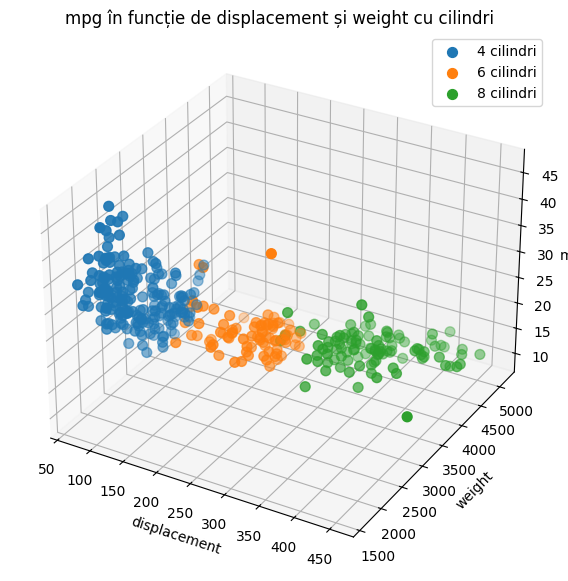

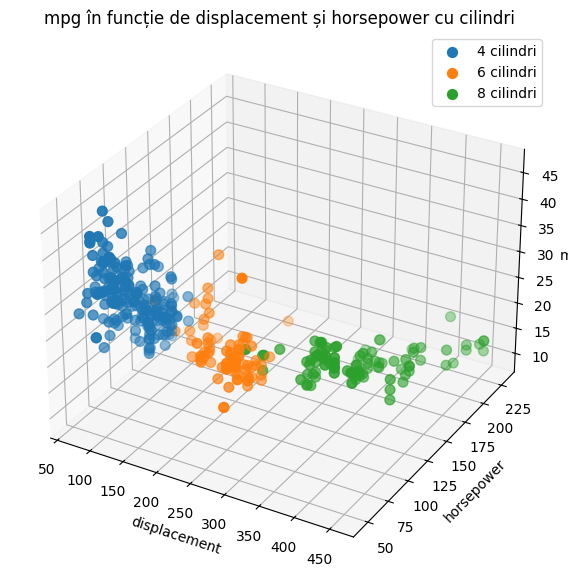

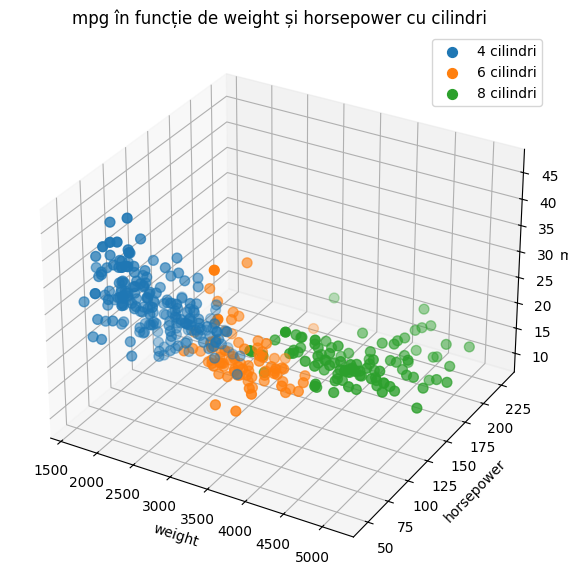

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
# Variabilele numerice pentru axele X și Y
numeric_vars = ['displacement', 'weight', 'horsepower']
z_col = 'mpg'

# Paleta de culori pentru cilindri
cylinder_colors = sns.color_palette("tab10", n_colors=df_clean['cylinders'].nunique())
cylinder_map = dict(zip(sorted(df_clean['cylinders'].unique()), cylinder_colors))

# Generăm toate combinațiile câte 2
comb = list(combinations(numeric_vars, 2))

for x_col, y_col in comb:
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter 3D cu culoare după cilindri
    for cyl, color in cylinder_map.items():
        subset = df_clean[df_clean['cylinders'] == cyl]
        ax.scatter(subset[x_col], subset[y_col], subset[z_col],
                   color=color, s=50, label=f'{cyl} cilindri')

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.set_title(f'{z_col} în funcție de {x_col} și {y_col} cu cilindri')
    ax.legend()
    plt.show()


Am prezentat cele mai evidente dependente ale consumului. Cu cat masa, cai putere sau capacitatea sunt mai mari, si consumul va creste.
De asemenea un nr mai mic de cilindrii, duce la un consum mai bun

## 9) Spre regresie (preview pentru cursul următor)
- Propune o **ipoteză de model**: 3–4 predictori rezonabili pentru **`mpg`** și de ce.
- Scrie 4–5 rânduri cu raționamentul tău.

> Scrie aici ipoteza ta 👇
Din analiza prezentata anterior, cei mai buni descriptori ar fi nr de cilindrii, masa, caii putere, capaciatea. Aceste dependente sunt prezentate in grafice.
Aceasta concluzie poate fi extrasa si din matricea corelatiilor. Se observa cum marimile mentionate anterior fac ca mpg sa scada, adica se consuma mai mult
Anul fabricatiei arata o corelatie pozitiva - ceea ce este de asteptat
In cazul acceleratiei, avem o corelatie mai slaba, care este normala, deoarece se dezvolta viteze mai mari cu aceeasi cantitate de combustibil

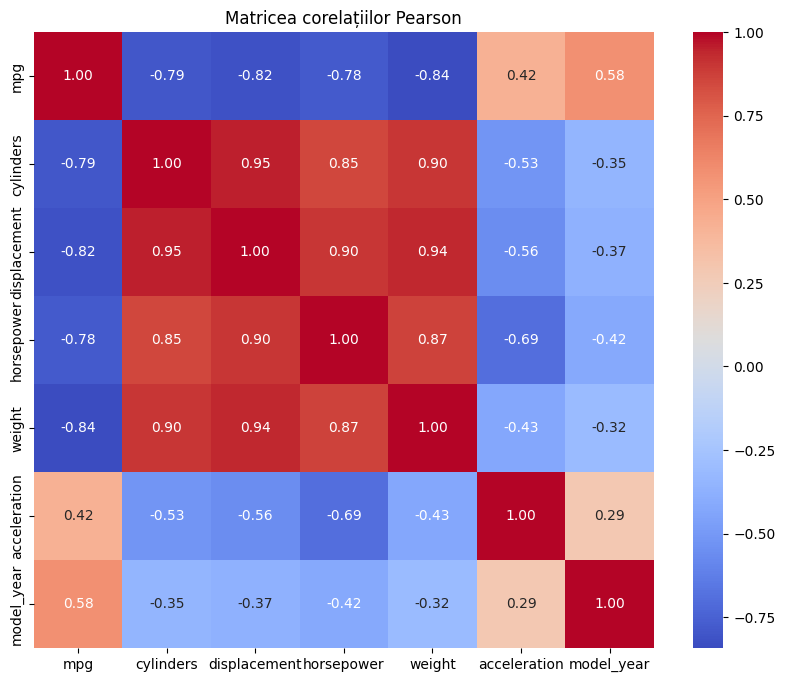

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matricea corelațiilor Pearson")
plt.show()
